In [1]:
from ortools.sat.python import cp_model
import numpy as np
import matplotlib.pyplot as plt

The objective of the puzzle is to switch the positions of all the colored frogs, so that all three green frogs are on the right and all three brown frogs are on the left. When all the frogs have reached the other side of the pond, you win!

A frog can jump a maximum of two spaces, and the destination spot must be free.

Green frogs can only hop to the right. Brown frogs can only hop to the left. Frogs can only jump onto an empty space. A frog can jump over one frog to an empty rock—but only over one.

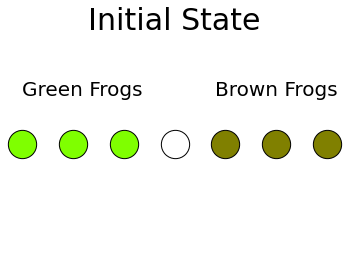

In [207]:
color = {0: 'w', -1: 'olive', 1: 'chartreuse'}
lists = [-3,-2,-1,0,1,2,3]

num = 1
count = 0

size = 800

# Initial grid
grid = [1,1,1,0,-1,-1,-1]

for i in range(len(grid)):
    plt.scatter(lists[count],0, marker='o', s = size, c = color[grid[i]], edgecolors='k');
    count+=1

plt.text(-3,.025,'Green Frogs', fontsize = 20)
plt.text(.8,.025,'Brown Frogs', fontsize = 20)

plt.title('Initial State', fontsize = 30);
plt.axis('off');
plt.show();

In [2]:


for i in range(len(grid)):
    

In [167]:
# Creates the model and set solver
model = cp_model.CpModel()
solver = cp_model.CpSolver()

S = range(30)

x = {(i,s): model.NewIntVar(-1,1, f'x_{i}_{s}') for i in range(len(grid)) for s in S}
left1 = {(i,s): model.NewBoolVar(f'left1_{i}_{s}') for i in range(len(grid)) for s in S}
right1 = {(i,s): model.NewBoolVar(f'right1_{i}_{s}') for i in range(len(grid)) for s in S}
left2 = {(i,s): model.NewBoolVar(f'left2_{i}_{s}') for i in range(len(grid)) for s in S}
right2 = {(i,s): model.NewBoolVar(f'right2_{i}_{s}') for i in range(len(grid)) for s in S}
term =  {(s): model.NewBoolVar(f'term_{s}') for s in S}

for i in range(len(grid)):
    model.Add(x[i,0] == grid[i])

model.AddAtLeastOne([term[s] for s in S])

for s in S:

    model.Add(sum(left1[i,s] + right1[i,s] + left2[i,s] + right2[i,s] for i in range(len(grid))) <= 1)

    model.Add(sum(x[i,s] for i in range(3)) == -3).OnlyEnforceIf(term[s])
    model.Add(sum(x[i,s] for i in range(4,7)) == 3).OnlyEnforceIf(term[s])

    if s > 0:
        if s != len(S):
            
            model.Add(term[s-1] <= term[s])

        for i in range(len(grid)):

            expr_l1 = [left1[i+a,s].Not() for a in [0,1] if i+a in range(len(grid))]
            expr_l2 = [left2[i+a,s].Not() for a in [0,2] if i+a in range(len(grid))]
            expr_r1 = [right1[i+a,s].Not() for a in [0,-1] if i+a in range(len(grid))]
            expr_r2 = [right2[i+a,s].Not() for a in [0,-2] if i+a in range(len(grid))]
            
            expr = expr_l1 + expr_l2 + expr_r1 + expr_r2
            
            model.Add(x[i,s-1] == x[i,s]).OnlyEnforceIf(expr)

            if i >= 1:

                model.Add(x[i,s-1] == -1).OnlyEnforceIf(left1[i,s])
                #model.Add(x[i,s-1] != 1).OnlyEnforceIf(left1[i,s])
                model.Add(x[i-1,s-1] == 0).OnlyEnforceIf(left1[i,s])

                model.Add(x[i,s] == 0).OnlyEnforceIf(left1[i,s])
                model.Add(x[i-1,s] == -1).OnlyEnforceIf(left1[i,s])

            if i <= 5:
                
                model.Add(x[i,s-1] == 1).OnlyEnforceIf(right1[i,s])
                #model.Add(x[i,s-1] != -1).OnlyEnforceIf(right1[i,s])
                model.Add(x[i+1,s-1] == 0).OnlyEnforceIf(right1[i,s])

                model.Add(x[i,s] == 0).OnlyEnforceIf(right1[i,s])
                model.Add(x[i+1,s] == 1).OnlyEnforceIf(right1[i,s])

            if i > 1:

                model.Add(x[i,s-1] == -1).OnlyEnforceIf(left2[i,s])
                #model.Add(x[i,s-1] != 1).OnlyEnforceIf(left2[i,s])
                model.Add(x[i-2,s-1] == 0).OnlyEnforceIf(left2[i,s])

                model.Add(x[i,s] == 0).OnlyEnforceIf(left2[i,s])
                model.Add(x[i-2,s] == -1).OnlyEnforceIf(left2[i,s])

            if i < 5:

                model.Add(x[i,s-1] == 1).OnlyEnforceIf(right2[i,s])
                #model.Add(x[i,s-1] != -1).OnlyEnforceIf(right2[i,s])
                model.Add(x[i+2,s-1] == 0).OnlyEnforceIf(right2[i,s])

                model.Add(x[i,s] == 0).OnlyEnforceIf(right2[i,s])
                model.Add(x[i+2,s] == 1).OnlyEnforceIf(right2[i,s])

            if i <= 1:
                model.Add(left2[i,s] == 0)
            if i == 0:
                model.Add(left1[i,s] == 0)
            if i >= 5:
                model.Add(right2[i,s] == 0)
            if i == 6:
                model.Add(right1[i,s] == 0)


            # model.Add().OnlyEnforceIf()

# Solving
status = solver.Solve(model)
print(f"Status = {solver.StatusName(status)}")

# Storing Solution
sol = [solver.value(x[i,s]) for s in S for i in range(len(grid))]
sol = np.reshape(sol,(len(S),1,7))

Status = OPTIMAL


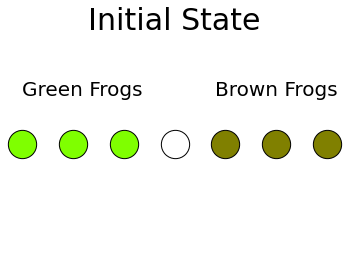

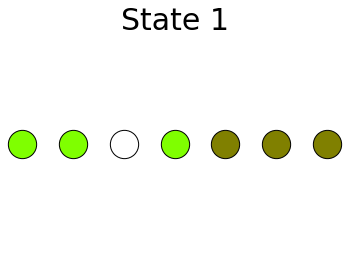

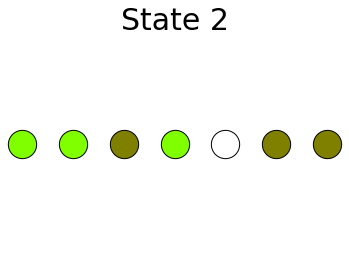

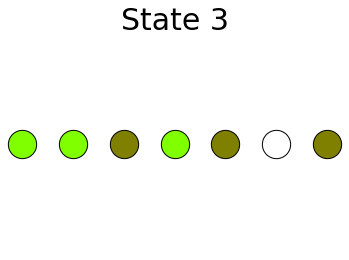

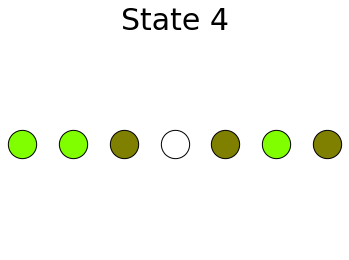

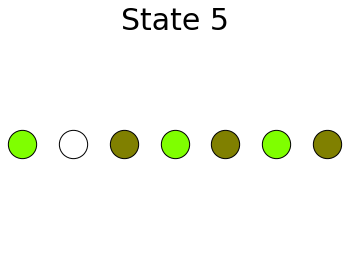

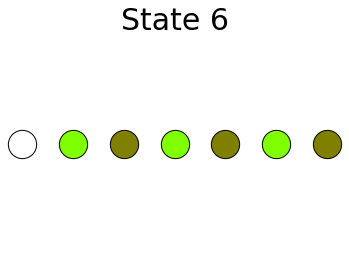

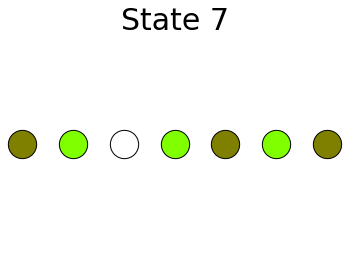

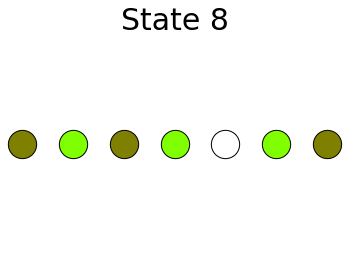

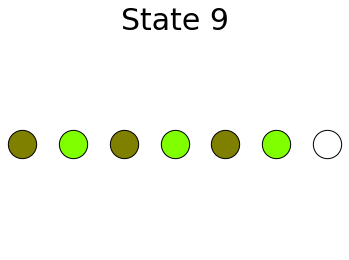

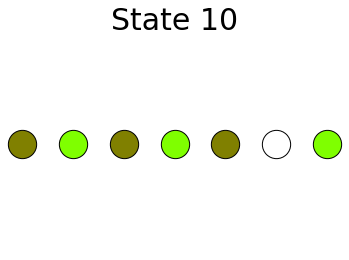

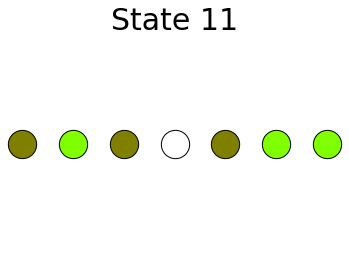

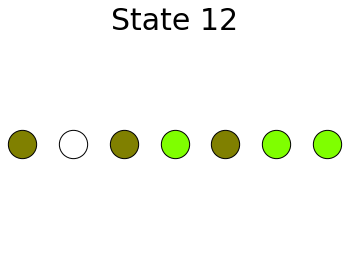

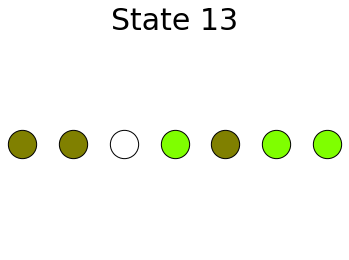

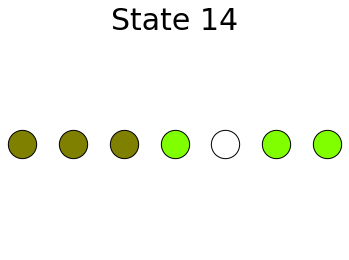

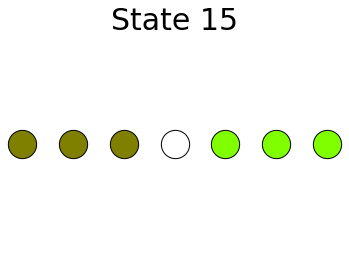

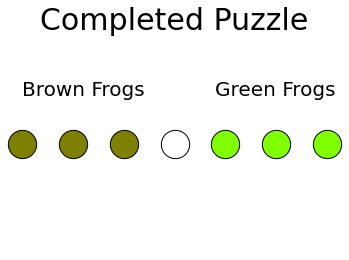

In [214]:
color = {0: 'w', -1: 'olive', 1: 'chartreuse'}
lists = [-3,-2,-1,0,1,2,3]

num = 1

size = 800

for s in S:
    count = 0
    if s > 0:
        if not np.array_equal(sol[s-1],sol[s]):
            for i in range(len(grid)):
                plt.scatter(lists[count],0, marker='o', s = size, c = color[sol[s,0,i]], edgecolors='k');
                count+=1
            plt.axis('off');
            plt.title(f'State {num}', fontsize = 30);
            plt.show();
            num+=1
        else:
            continue
    else:
        for i in range(len(grid)):
            plt.scatter(lists[count],0, marker='o', s = size, c = color[sol[s,0,i]], edgecolors='k');
            plt.title('Initial State', fontsize = 30);
            count+=1
        plt.axis('off');
        plt.text(-3,.025,'Green Frogs', fontsize = 20)
        plt.text(.8,.025,'Brown Frogs', fontsize = 20)
        plt.show();

count = 0
for i in range(len(grid)):
    plt.scatter(lists[count],0, marker='o', s = size, c = color[sol[s,0,i]], edgecolors='k');
    count+=1

plt.text(-3,.025,'Brown Frogs', fontsize = 20)
plt.text(.8,.025,'Green Frogs', fontsize = 20)

plt.title('Completed Puzzle', fontsize = 30);
plt.axis('off');
plt.show();
